In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split


In [2]:
train_data=pd.read_csv("/kaggle/input/medical-insurance-premium-prediction/Medicalpremium.csv")
train_data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
y=train_data.PremiumPrice
X=train_data.iloc[:,0:-1]
train_X,val_X,train_y,val_y=train_test_split(X,y)

In [4]:
#d=train_data.to_dict()

In [5]:
#import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
import logging
logging.captureWarnings(True)



In [6]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(2)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
 
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Optimal number of features: 9


{'mean_test_score': array([0.37423935, 0.54665314, 0.55375254, 0.59127789, 0.60141988,
       0.58823529, 0.60040568, 0.60446247, 0.62474645, 0.60750507]), 'std_test_score': array([0.01115619, 0.02332657, 0.01217039, 0.02738337, 0.01318458,
       0.02231237, 0.02434077, 0.02636917, 0.00811359, 0.01318458]), 'split0_test_score': array([0.38539554, 0.56997972, 0.54158215, 0.56389452, 0.58823529,
       0.56592292, 0.57606491, 0.57809331, 0.61663286, 0.59432049]), 'split1_test_score': array([0.36308316, 0.52332657, 0.56592292, 0.61866126, 0.61460446,
       0.61054767, 0.62474645, 0.63083164, 0.63286004, 0.62068966])}


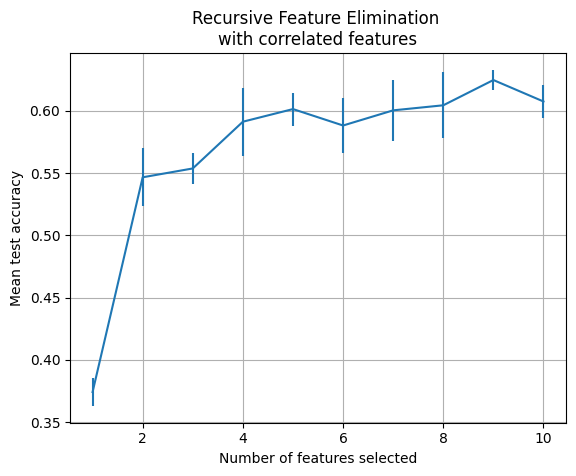

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

#n_features = len(X.columns)-1

#print(n_features)
cv_results = rfecv.cv_results_
print(cv_results)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=[i for i in range(1,11)],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.grid()
plt.show()

In [8]:
# Create a logistic regression model
logreg = LogisticRegression()
# Create a sequential feature selector
selector = SequentialFeatureSelector(logreg, n_features_to_select=5, scoring='accuracy')

# Fit the selector to the data
selector.fit(X, y)

# Get the selected features
selected_features = selector.get_support()
#print('The selected features are:', list(X.columns[selected_features]))


In [9]:
print('The selected features are:', list(X.columns[selected_features]))

The selected features are: ['Age', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
